In [1]:
import pandas as pd
from dataProcessor import process_metadata, clean_text, correct_misinterpreted_characters, pew_metadata_path, statista_metadata_path, llava_description_path
#  get the combined dataframe
combined_df = process_metadata(pew_metadata_path, statista_metadata_path, llava_description_path)
combined_df.shape

(29354, 5)

In [2]:
# Apply text cleaning and correction functions
combined_df['title'] = combined_df['title'].apply(clean_text).apply(correct_misinterpreted_characters)
combined_df['caption'] = combined_df['caption'].apply(clean_text).apply(correct_misinterpreted_characters)
combined_df['llava_description'] = combined_df['llava_description'].apply(clean_text).apply(correct_misinterpreted_characters)

In [3]:
combined_df

,id,title,caption,imgPath,llava_description
0,1,"Foreign-born population in the United States, ...",The foreign-born population residing in the U....,../dataset/pew_dataset/pew_imgs/1.png,The chart you've provided appears to be a line...
1,2,"English proficiency among U.S. immigrants, 198...","Since 1980, the share of immigrants who are pr...",../dataset/pew_dataset/pew_imgs/2.png,The chart you've provided shows the percentage...
2,3,"Languages spoken among U.S. immigrants, 2018","Among the nation’s immigrants, Spanish is by f...",../dataset/pew_dataset/pew_imgs/3.png,The chart presents the percentage of immigrant...
3,4,"Hispanic population in the U.S., 2000-2017",There were nearly 60 million Latinos in the Un...,../dataset/pew_dataset/pew_imgs/4.png,The chart you've provided appears to be a line...
4,5,Weekly broadcast audience for top 20 NPR-affil...,The top 20 NPR-affiliated public radio station...,../dataset/pew_dataset/pew_imgs/5.png,The chart you've provided is a line graph show...
...,...,...,...,...,...
29349,29350,Distribution of cyber stalking victims in 2013...,This statistic presents the distribution of cy...,../dataset/statista_dataset/statista_imgs/2786...,The chart you've provided appears to be a bar ...
29350,29351,Total number of dwellings in Great Britain fro...,This statistic displays the total number of dw...,../dataset/statista_dataset/statista_imgs/2786...,The chart you've provided appears to be a line...
29351,29352,Results in the European Parliament elections i...,This statistic shows the political parties and...,../dataset/statista_dataset/statista_imgs/2786...,The chart you've provided appears to be a bar ...
29352,29353,Average annual expenditure on curtains and dra...,This statistic shows the average annual expend...,../dataset/statista_dataset/statista_imgs/2786...,The chart you've provided appears to be a line...


In [4]:
from torch import Tensor
from transformers import AutoTokenizer

# Load the tokenizer and quantized model
tokenizer = AutoTokenizer.from_pretrained('allenai/longformer-base-4096')

# Function to tokenize the caption and get token length
def get_token_length(row):
    # Tokenize the title and description separately and count the tokens
    title_tokens = tokenizer(row['title'], return_tensors="pt")
    caption_tokens = tokenizer(row['caption'], return_tensors="pt")
    
    # Get the token counts for each
    title_token_length = title_tokens['input_ids'].shape[1]
    caption_tokens_length = caption_tokens['input_ids'].shape[1]
    
    return title_token_length, caption_tokens_length


# Apply the function to each row and store the token lengths in separate columns
combined_df[['title_token_length', 'caption_tokens_length']] = combined_df.apply(lambda row: pd.Series(get_token_length(row)), axis=1)

# Select only the required columns to view the results
combined_df = combined_df[['id', 'title', 'caption', 'title_token_length', 'caption_tokens_length']]

# Sort the DataFrame by token length in descending order
combined_df = combined_df.sort_values(by='caption_tokens_length', ascending=False)

combined_df

/home/mleshashi/thesis-sharma/sraEnv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,title,caption,title_token_length,caption_tokens_length
11346,11347,Population of Poland from 1800 to 2020 ...,"Throughout the nineteenth century, what we kno...",68,990
8186,8187,Number of assassinations and assassination att...,"Throughout U.S. history, there have been count...",23,882
6540,6541,Population of France from 1700 to 2020 ...,"During the eighteenth century, it is estimated...",68,843
7487,7488,Population of Greece from 1821 to 2020 ...,"Prior to 1829, the area of modern day Greece w...",69,840
4069,4070,Reported number of slaves owned by U.S. presid...,Of the first eighteen presidents of the United...,81,785
...,...,...,...,...,...
5991,5992,Heads of state and government with the highest...,This statistic shows the heads of state and go...,74,17
10807,10808,Market forecast of global greentech industries...,This statistic gives a market forecast of the ...,17,17
12156,12157,Japan's largest container-handling ports in 20...,The statistic shows the container-handling cap...,69,16
13031,13032,Perception of leadership abilities of the (pot...,57 percent of respondents believe candidate Jo...,23,15


In [6]:
# Calculating statistics for title and caption token lengths
max_title_token_length = combined_df['title_token_length'].max()
min_title_token_length = combined_df['title_token_length'].min()
mean_title_token_length = combined_df['title_token_length'].mean()
median_title_token_length = combined_df['title_token_length'].median()

max_caption_token_length = combined_df['caption_tokens_length'].max()
min_caption_token_length = combined_df['caption_tokens_length'].min()
mean_caption_token_length = combined_df['caption_tokens_length'].mean()
median_caption_token_length = combined_df['caption_tokens_length'].median()

# Create a dictionary to store the results
token_stats = {
    'Title': {
        'Max': max_title_token_length,
        'Min': min_title_token_length,
        'Mean': mean_title_token_length,
        'Median': median_title_token_length
    },
    'Caption': {
        'Max': max_caption_token_length,
        'Min': min_caption_token_length,
        'Mean': mean_caption_token_length,
        'Median': median_caption_token_length
    }
}

# Convert to a DataFrame to display the results
token_stats_df = pd.DataFrame(token_stats)

# Display the DataFrame
print(token_stats_df)

             Title     Caption
Max     139.000000  990.000000
Min       3.000000   15.000000
Mean     42.603427   88.935988
Median   25.000000   57.000000


In [14]:
from torch import Tensor
from transformers import AutoTokenizer

# Load the tokenizer and quantized model
tokenizer = AutoTokenizer.from_pretrained('allenai/longformer-base-4096')

# Function to tokenize the combined title and caption and get token length
def get_token_length(row):
    # Combine the title and caption into one string
    combined_text = row['title'] + ";" + row['caption']
    
    # Tokenize the combined text and count the tokens
    combined_tokens = tokenizer(combined_text, return_tensors="pt")
    
    # Get the token count for the combined text
    combined_token_length = combined_tokens['input_ids'].shape[1]
    
    return combined_token_length


# Apply the function to each row and store the token lengths in a new column
combined_df['combined_token_length'] = combined_df.apply(lambda row: get_token_length(row), axis=1)

# Select only the required columns to view the results
combined_df = combined_df[['id', 'title', 'caption', 'combined_token_length']]

# Sort the DataFrame by token length in descending order
combined_df = combined_df.sort_values(by='combined_token_length', ascending=False)

combined_df

,id,title,caption,combined_token_length
11346,11347,Population of Poland from 1800 to 2020 ...,"Throughout the nineteenth century, what we kno...",1056
6540,6541,Population of France from 1700 to 2020 ...,"During the eighteenth century, it is estimated...",909
7487,7488,Population of Greece from 1821 to 2020 ...,"Prior to 1829, the area of modern day Greece w...",907
8186,8187,Number of assassinations and assassination att...,"Throughout U.S. history, there have been count...",904
4069,4070,Reported number of slaves owned by U.S. presid...,Of the first eighteen presidents of the United...,864
...,...,...,...,...
15730,15731,Do you yourself smoke marijuana?,This statistic shows the results of a 2015 sur...,34
10807,10808,Market forecast of global greentech industries...,This statistic gives a market forecast of the ...,33
20116,20117,Working population share in Luxembourg from 20...,"In 2020, approximately 70 percent of the popul...",32
16094,16095,Number of terrorist attacks in 2011 by region,The statistic shows the number of terrorist at...,31


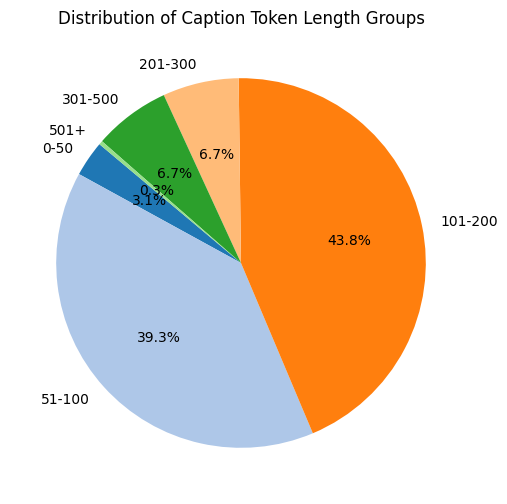

In [15]:
# Create 6 groups based on caption token lengths, adding a new category for 0-50 tokens
bins = [0, 50, 100, 200, 300, 500, np.inf]  # Define the bin ranges
labels = ['0-50', '51-100', '101-200', '201-300', '301-500', '501+']  # Define the labels for the bins

# Categorize captions into these 6 groups
combined_df['token_group'] = pd.cut(combined_df['combined_token_length'], bins=bins, labels=labels, right=False)

# Count the number of captions in each group
group_counts = combined_df['token_group'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('Distribution of Caption Token Length Groups')
plt.show()

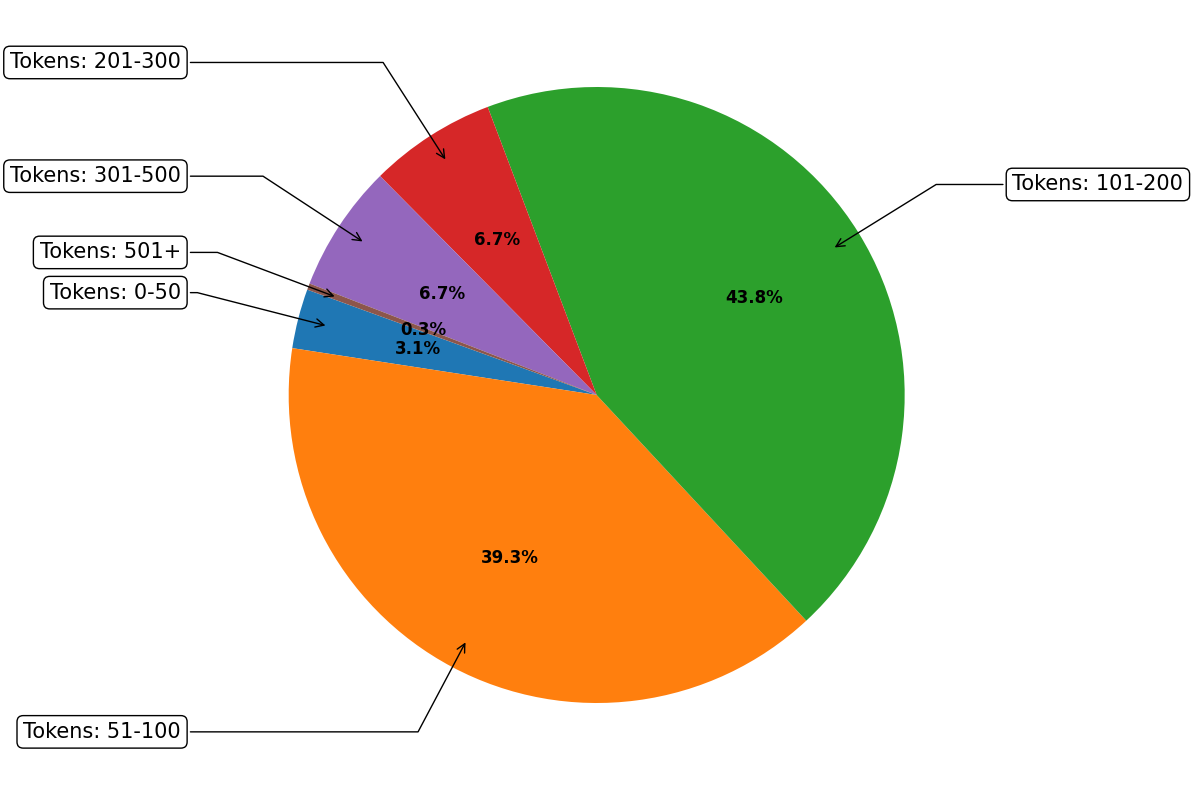

In [20]:
# Create 6 groups based on caption token lengths, adding a new category for 0-50 tokens
bins = [0, 50, 100, 200, 300, 500, np.inf]  # Define the bin ranges
labels = ['0-50', '51-100', '101-200', '201-300', '301-500', '501+']  # Define the labels for the bins

# Categorize captions into these 6 groups
combined_df['token_group'] = pd.cut(combined_df['combined_token_length'], bins=bins, labels=labels, right=False)

# Count the number of captions in each group
group_counts = combined_df['token_group'].value_counts().sort_index()

# Define the sizes based on group counts
sizes = group_counts.values
labels = group_counts.index

# Colors for each section
colors = plt.get_cmap('tab10').colors

# Create a pie chart with leader lines and annotations
fig, ax = plt.subplots(figsize=(16, 10))
wedges, texts, autotexts = ax.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=160)

# Add annotations with pointers (leader lines) and explicitly mention "Tokens" in the label
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.9 * np.cos(np.radians(angle))
    y = wedge.r * 0.9 * np.sin(np.radians(angle))

    # Modify the label to indicate token length ranges clearly
    label = f'Tokens: {labels[i]}'  
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"

    ax.annotate(label, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, fontsize=15,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
                arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))

plt.setp(autotexts, size=12, weight="bold", color="black")

# Save the pie chart to the dataset folder
image_path = '../dataset/token_distribution.png'
plt.savefig(image_path)

# Display the pie chart
plt.show()